# Distance maps with overlapping

In [1]:
import cv2
from fiberrandom import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis
from functions import *

In [108]:
canvas = np.zeros((256,256,3), np.uint8)
#print(canvas.shape)

sample = FiberSample(256,256,False)
waves = sample.createRandomWaves(10)
diameter = 5

for wave in waves:
    wave = np.array(wave).astype(int)
    wave = wave.reshape((-1,1,2))
    image = np.zeros((256,256,1), np.uint8)
    cv2.polylines(image,[wave],False,(255,255,255),diameter,cv2.LINE_AA)
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.distanceTransform(image,cv2.DIST_L2,3)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    #image = image[:,:,newaxis]
    foreground = image[:,:]>0
    #print(foreground.shape)
    canvas[foreground] = image[foreground]


(256, 256, 3)


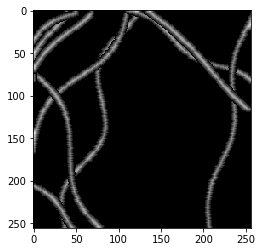

In [109]:
#canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)
print(canvas.shape)
cv2.normalize(canvas, canvas, 0, 255, cv2.NORM_MINMAX)
plt.imshow(canvas, cmap='gray')
plt.show()

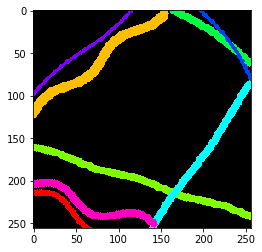

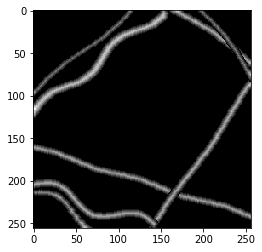

In [124]:
# images and masks (distance maps)

size = (256, 256, 3)

img = np.zeros(size, np.uint8)
dm = np.zeros(size, np.uint8)

sample = FiberSample(256,256,False)
fibers = randint(3,15)
waves = sample.createRandomWaves(fibers)
#diameter = 5

colors = randcolors(len(waves))

for i,wave in enumerate(waves):
    diameter = randint(3, 10)
    wave = np.array(wave).astype(int)
    wave = wave.reshape((-1,1,2))
    image = np.zeros((256,256,1), np.uint8)
    cv2.polylines(image,[wave],False,(255,255,255),diameter,cv2.LINE_AA)
    image = cv2.distanceTransform(image,cv2.DIST_L2,3)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    foreground = image[:,:]>0
    dm[foreground] = image[foreground]
    
    #thickness = randint(fiber_thickness[0],fiber_thickness[1])
    cv2.polylines(img, [wave], False, colors[i], diameter, cv2.LINE_8)
    

plt.imshow(img)
plt.show()
    
cv2.normalize(dm, dm, 0, 255, cv2.NORM_MINMAX)
plt.imshow(dm, cmap='gray')
plt.show()

In [3]:
# creando el dataset

sample = FiberSample(256,256,printout=False)
imgs_dir = 'data_dm_overlapping/images'
masks_dir = 'data_dm_overlapping/masks'
initDirectory(imgs_dir)
initDirectory(masks_dir)

for i in range(500):
    sample.setFibers((3,15))
    sample.setDiameters((3,10))
    sample.createDistanceMapSample()
    sample.saveDistanceMapSample(imgs_dir, masks_dir, i)